<a href="https://colab.research.google.com/github/mykon23/AI-2020/blob/master/Activities/Activity4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Univariate Linear Regression  

In [430]:
!wget -O Pokemon.csv https://github.com/mykon23/AI-2020/blob/master/Data/Pokemon.csv?raw=True

--2020-09-12 04:00:53--  https://github.com/mykon23/AI-2020/blob/master/Data/Pokemon.csv?raw=True
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mykon23/AI-2020/raw/master/Data/Pokemon.csv [following]
--2020-09-12 04:00:53--  https://github.com/mykon23/AI-2020/raw/master/Data/Pokemon.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mykon23/AI-2020/master/Data/Pokemon.csv [following]
--2020-09-12 04:00:53--  https://raw.githubusercontent.com/mykon23/AI-2020/master/Data/Pokemon.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200

In [431]:
import pandas as pd
pokemon_data = pd.read_csv('Pokemon.csv')
pokemon_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [432]:
## Only acquire the stats of the Pokemon
stats = { 'x': 'Speed', 'y': 'HP' }
x_col = pokemon_data.columns.to_list().index( stats['x'] )
y_col = pokemon_data.columns.to_list().index( stats['y'] )

In [433]:
import numpy as np
dataset = np.loadtxt('Pokemon.csv', delimiter=',', usecols = (x_col, y_col) )

print(dataset.shape)
print(dataset[0:5])

(800, 2)
[[45. 45.]
 [60. 60.]
 [80. 80.]
 [80. 80.]
 [65. 39.]]


In [434]:
X = dataset[:,0]
Y = dataset[:,1]

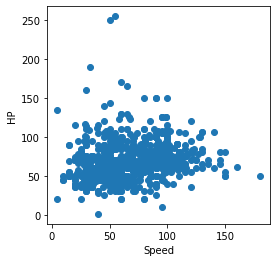

In [435]:
import matplotlib.pyplot as plt

##Print the un-normalized data

plt.figure(figsize=(4,4))
plt.scatter(X, Y)
plt.xlabel(stats['x'])
plt.ylabel(stats['y'])
plt.show()

In [436]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim = 1, activation='linear'))

In [437]:
model.compile(loss='mse', optimizer = 'rmsprop', metrics=['mse'])
model.fit( X, Y, epochs = 256, verbose = 0)

In [438]:
print('Model weights - w0(slope m), bias):')
w0 = model.layers[0].get_weights()[0][0]
b0 = model.layers[0].get_weights()[1]
print(w0)
print(b0)

Model weights - w0(slope m), bias):
[0.8200873]
[5.1846485]


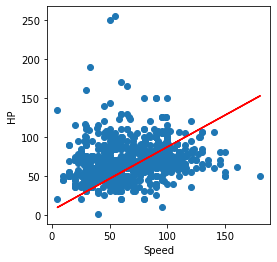

In [439]:
plt.figure(figsize=(4,4))
plt.scatter(X, Y)
plt.plot(X, b0 + w0 * X, '-', color = 'red')
plt.xlabel(stats['x'])
plt.ylabel(stats['y'])
plt.show()

# Univariate Linear Regression with Normalization

In [440]:
# Min-max normalization
min = X.min(axis = 0) 
max = X.max(axis = 0) 
X = (X - min) / (max - min)

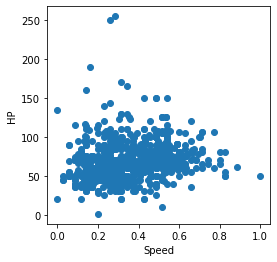

In [441]:
## Plot normalized data points

plt.figure(figsize=(4,4))
plt.scatter(X, Y)
plt.xlabel(stats['x'])
plt.ylabel(stats['y'])
plt.show()

In [442]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim = 1, activation='linear'))

In [443]:
model.compile(loss='mse', optimizer = 'rmsprop', metrics=['mse'])
model.fit( X, Y, epochs = 1024, verbose = 0)
model.fit( X, Y, epochs = 1024, verbose = 0)

In [444]:
print('Model weights - w0(slope m), bias):')
w0 = model.layers[0].get_weights()[0][0]
b0 = model.layers[0].get_weights()[1]
print(w0)
print(b0)

Model weights - w0(slope m), bias):
[48.62038]
[48.856304]


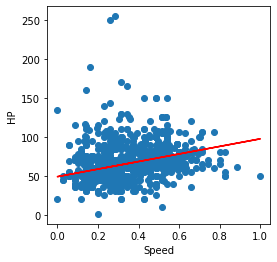

In [445]:
plt.figure(figsize=(4,4))
plt.scatter(X, Y)
plt.plot(X, b0 + w0 * X, '-', color = 'red')
plt.xlabel(stats['x'])
plt.ylabel(stats['y'])
plt.show()

Perhaps More Epochs are needed based on the output of Univariate Regression